# Homework 09
This homework is based on the classification and regression lectures.

In [ ]:
library(tidyverse)
library(ggplot2)
library(dplyr)
#install.packages("glmnet")
#install.packages("caret")

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.1     ✔ stringr   1.5.2
✔ ggplot2   4.0.0     ✔ tibble    3.3.0
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.1.0     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


## Question 1
#### In the table below, fill in the definition column with a short (no more than two sentence) definition for each vocab word. If it can be summarized by a formula, give the formula.

| Vocab Word | Definition |
|:--------|:--------|
| **One-hot coding** | converts each category into a separate binary (0/1) column |
| **Feature selection*** | This is done to build the ideal parsimonious model. Done to reduce model complexity, increase interpretability, better performance, and uses LASSO regression or standard linear regression to do so. |
| **Classifier** | a model that assigns inputs to categories (classes) instead of predicting numeric values |
| **Precision** | true positives / (true positives + false positives |
| **Recall** | true positives / (true positives + false negatives) |
| **F1 Score** | f_1 = 2(precision x recall)/(precision + recall) |
| **Parsimonious model** | model that is the simplest adequate explanation for the data. It is a model that uses the minimum number of features but still achieves a sufficient level of predictive accuracy. |
| **Ridge regression** | statistical technique that adds a penalty to a standard linear regression model. |
| **LASSO regression** | forces coefficients to zero one at a time rather than constraining the total coeffiicent sum. |
| **Cross validation** | compares models fairly by addressing the randomness of the train/test split. |
| **Tree based methods** | These methods recursively partition the feature space into smaller regions to make a final prediction. Classification tree does the prediction based on mode, while the regression tree does the prediction based on the mean. |

*Just give the general idea.

## Question 2
#### a) What shape does a perfect classifier look like on an ROC curve? What about a bad classifier?
#### b) Think about the formula for an F1 score. What does it mean when the F1 score is close to 1? Close to 0?

a) The shape that a perfect classifir looks like on an ROC curve is a rectangle/square where it starts at the origin and goes straight up to the top left corner (0,1) and then straight across to the top right corner (1,1). Bad classifier would look like a straight diagonal line from the bottom left of the graph to the top right. This would mean that true positive rate would always equal false positive rate.

b) If the F1 score is close to 1.0, that means that the classifer has high precision and high recall. If the F1 score is close to 0.0, then either precision, recall, or both are low.

## Question 3
#### Compare the following aspects of linear vs. logistic regression.
|  | Linear | Logistic |
|:--------|:--------|:--------|
| **Chart Shape** | straight line | S-shaped (sigmoid/logit curve) |
| **Dependent Variable Type** | continuous/numerical | dichotomous/categorical |
| **Purpose** (regression or classification) | predicting a quantity | predicting a probability |
| **Range of output variable** ($y_i$ or $p_i$) | any real number | [0,1] |
| **Method*** | ordinary least squares | maximum likelihood estimation |
| **Example of use** | estimating the income based on hours worked. | predicting whether someone gets into university based on their sat/act score, gpa, number of ap classes, etc. |  
  
*Meaning ordinary least squares or maximum likelihood estimation

## Question 4
#### Why is it important to train then test our model? How do we do that? (2-3 sentences. Not looking for code, just general explanation).

It is important to train then test data in order to be able to generalize the model to new, unseen data. To do this, a portion of the dataset is kept aside as the "testing" data and the rest is the "training" data so that we are able to test the model's accuracy on new data that wasn't being use to evaluate the model.

## Question 5
This question runs through a linear regression example. We want to predict median house value based on the other variables.
#### a) First, load the `housing.csv` data set. Look at the data in some useful way. Why is linear regression appropriate here?

In [ ]:
housing <- read.csv("housing.csv")

summary(housing)

   longitude         latitude     housing_median_age  total_rooms   
 Min.   :-124.3   Min.   :32.54   Min.   : 1.00      Min.   :    2  
 1st Qu.:-121.8   1st Qu.:33.93   1st Qu.:18.00      1st Qu.: 1448  
 Median :-118.5   Median :34.26   Median :29.00      Median : 2127  
 Mean   :-119.6   Mean   :35.63   Mean   :28.64      Mean   : 2636  
 3rd Qu.:-118.0   3rd Qu.:37.71   3rd Qu.:37.00      3rd Qu.: 3148  
 Max.   :-114.3   Max.   :41.95   Max.   :52.00      Max.   :39320  
   population      households     median_income     median_house_value
 Min.   :    3   Min.   :   1.0   Min.   : 0.4999   Min.   : 14999    
 1st Qu.:  787   1st Qu.: 280.0   1st Qu.: 2.5634   1st Qu.:119600    
 Median : 1166   Median : 409.0   Median : 3.5348   Median :179700    
 Mean   : 1425   Mean   : 499.5   Mean   : 3.8707   Mean   :206856    
 3rd Qu.: 1725   3rd Qu.: 605.0   3rd Qu.: 4.7432   3rd Qu.:264725    
 Max.   :35682   Max.   :6082.0   Max.   :15.0001   Max.   :500001    

Linear regression is appropriate here because the outcome of median_house_value is continuous and has many numeric predictors.

#### b) Scale data and split it 75/25 training/testing. Set seed = 123.

In [ ]:
# Scale
scale <- function(a){
  (a - min(a))/(max(a)-min(a))
}

scaled_data <- housing %>% select(where(is.numeric)) %>%
  mutate(across(where(is.numeric), scale))

# Train/test split
set.seed(123)
train <- runif(nrow(scaled_data)) < 0.75
test <- !train

#### c) Fit the model.

In [ ]:
f = median_house_value ~ longitude + latitude + housing_median_age + total_rooms + population + households + median_income

m <- lm(f, data = scaled_data %>%
  filter(train))

summary(m)


Call:
lm(formula = f, data = scaled_data %>% filter(train))

Residuals:
     Min       1Q   Median       3Q      Max 
-1.11495 -0.09080 -0.02335  0.06400  1.00888 

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)         0.728806   0.015356   47.46   <2e-16 ***
longitude          -0.868215   0.016894  -51.39   <2e-16 ***
latitude           -0.817586   0.015007  -54.48   <2e-16 ***
housing_median_age  0.122501   0.005194   23.59   <2e-16 ***
total_rooms        -0.065063   0.065076   -1.00    0.317    
population         -3.526248   0.092512  -38.12   <2e-16 ***
households          1.967049   0.062952   31.25   <2e-16 ***
median_income       1.143536   0.010837  105.52   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.1425 on 15556 degrees of freedom
Multiple R-squared:  0.6399,	Adjusted R-squared:  0.6397 
F-statistic:  3948 on 7 and 15556 DF,  p-value: < 2.2e-16


#### d) Make predictions on test data and show them in an actual vs. predicted plot.

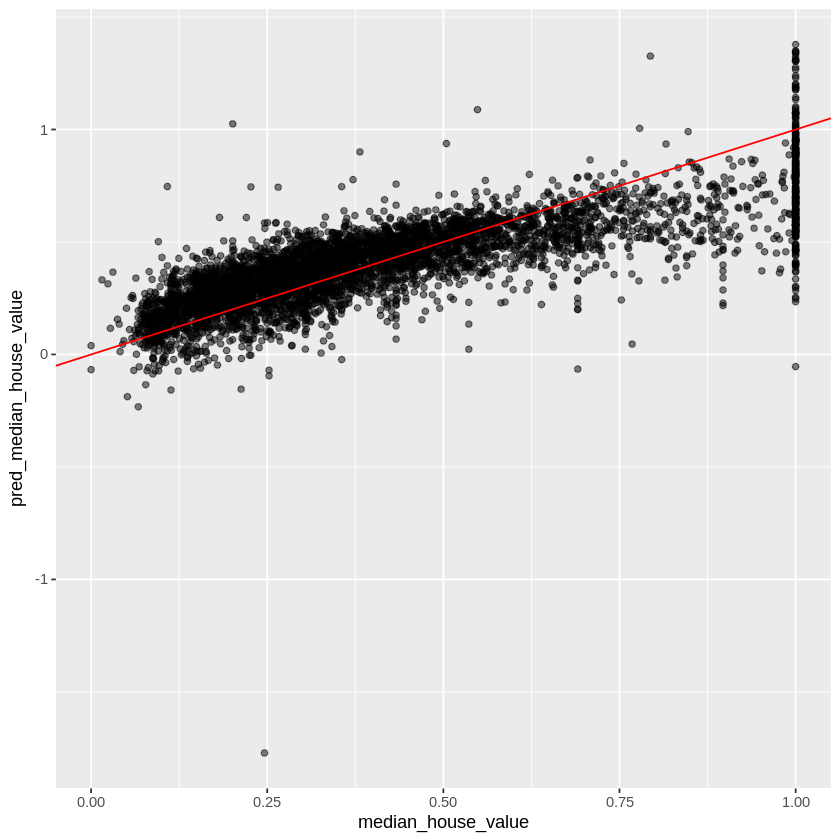

In [ ]:
hs <- scaled_data[test, ]

hs <- hs %>%
  mutate(pred_median_house_value = predict(m, newdata = hs))

ggplot(hs, aes(x = median_house_value, y = pred_median_house_value)) +
  geom_point(alpha = 0.5) +
    geom_abline(slope = 1, intercept = 0, color = "red")

#### e) Make a residuals plot.

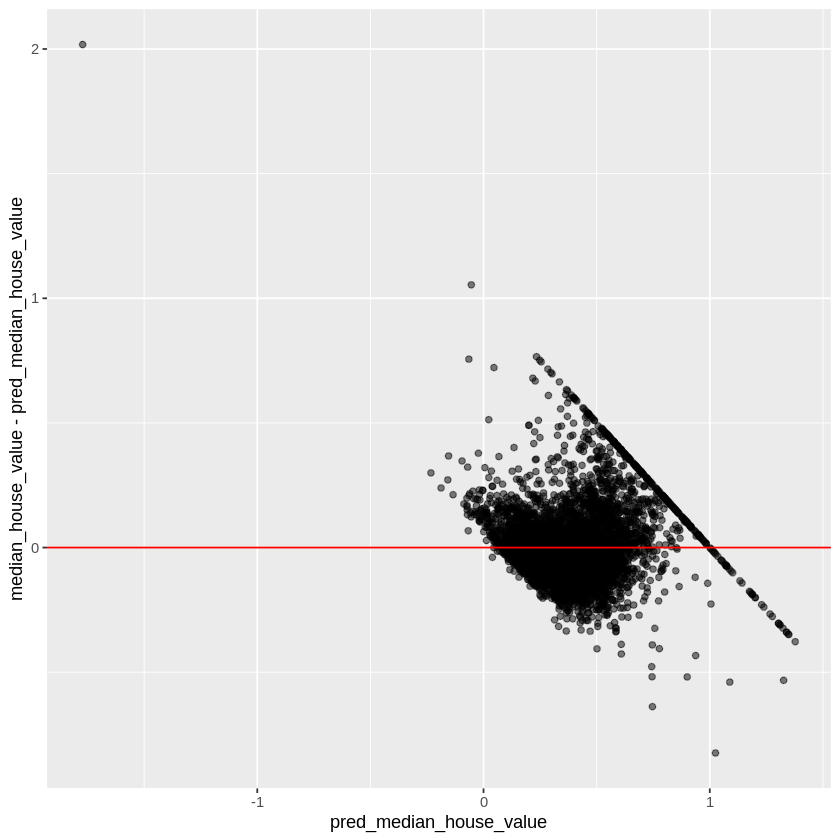

In [ ]:
ggplot(hs, aes(x = pred_median_house_value, y = median_house_value -  pred_median_house_value)) +
  geom_point(alpha = 0.5) +
  geom_hline(yintercept = 0, color = "red")

## Question 6
This question runs through a logistic regression example. We want to predict diabetes diagnosis based on the other variables.
#### a) First, load the `diabetes.csv` data set. Look at the data in some useful way. Why is logistic regression appropriate here?

In [ ]:
diabetes <- read_csv("diabetes.csv")

summary(diabetes)

Rows: 768 Columns: 9
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (9): Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, D...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


  Pregnancies        Glucose      BloodPressure    SkinThickness  
 Min.   : 0.000   Min.   :  0.0   Min.   :  0.00   Min.   : 0.00  
 1st Qu.: 1.000   1st Qu.: 99.0   1st Qu.: 62.00   1st Qu.: 0.00  
 Median : 3.000   Median :117.0   Median : 72.00   Median :23.00  
 Mean   : 3.845   Mean   :120.9   Mean   : 69.11   Mean   :20.54  
 3rd Qu.: 6.000   3rd Qu.:140.2   3rd Qu.: 80.00   3rd Qu.:32.00  
 Max.   :17.000   Max.   :199.0   Max.   :122.00   Max.   :99.00  
    Insulin           BMI        DiabetesPedigreeFunction      Age       
 Min.   :  0.0   Min.   : 0.00   Min.   :0.0780           Min.   :21.00  
 1st Qu.:  0.0   1st Qu.:27.30   1st Qu.:0.2437           1st Qu.:24.00  
 Median : 30.5   Median :32.00   Median :0.3725           Median :29.00  
 Mean   : 79.8   Mean   :31.99   Mean   :0.4719           Mean   :33.24  
 3rd Qu.:127.2   3rd Qu.:36.60   3rd Qu.:0.6262           3rd Qu.:41.00  
 Max.   :846.0   Max.   :67.10   Max.   :2.4200           Max.   :81.00  
    Outcome  

#### b) Scale data and split it 75/25 training/testing. Set seed = 123.

In [ ]:
# Scale
scale <- function(a){
  (a - min(a))/(max(a)-min(a))
}

scaled_data <- diabetes %>% select(where(is.numeric)) %>%
  mutate(across(where(is.numeric), scale))

# Train/test split
set.seed(123)
n <- nrow(scaled_data)
train_idx <- sample.int(n, size = floor(0.75 * n))
d_train <- scaled_data %>% slice(train_idx)
d_test  <- scaled_data %>% slice(setdiff(seq_len(n), train_idx))

d_train %>% write_csv("diabetes_train.csv")
d_test  %>% write_csv("diabetes_test.csv")

#### c) Fit the model.

In [ ]:
f <- Outcome ~ .
m <- glm(f, data = d_train, family = binomial())

summary(m)


Call:
glm(formula = f, family = binomial(), data = d_train)

Coefficients:
                         Estimate Std. Error z value Pr(>|z|)    
(Intercept)               -8.0501     0.7875 -10.223  < 2e-16 ***
Pregnancies                1.9808     0.6376   3.107  0.00189 ** 
Glucose                    7.3239     0.8832   8.293  < 2e-16 ***
BloodPressure             -1.6659     0.7236  -2.302  0.02131 *  
SkinThickness              0.4781     0.7778   0.615  0.53875    
Insulin                   -1.1441     0.8556  -1.337  0.18117    
BMI                        5.7136     1.1584   4.932 8.12e-07 ***
DiabetesPedigreeFunction   1.6852     0.7724   2.182  0.02912 *  
Age                        0.9522     0.6526   1.459  0.14456    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 745.11  on 575  degrees of freedom
Residual deviance: 538.57  on 567  degrees of freedom
AIC: 556.57

Number of Fisher 

#### d) Make predictions on test data. Print a table with the number of true positives, false positives, true negatives, false negatives, and accuracy.

In [ ]:
p <- predict(m, newdata = d_test, type = "response")
pred <- as.integer(p >= 0.5)
truth <- d_test$Outcome

tp <- sum(pred == 1 & truth == 1)
fp <- sum(pred == 1 & truth == 0)
tn <- sum(pred == 0 & truth == 0)
fn <- sum(pred == 0 & truth == 1)
acc <- (tp + tn) / (tp + fp + tn + fn)

df <- tibble(
  measure = c("True Positive", "False Positive", "True Negative", "False Negative", "Accuracy"),
  value   = c(tp, fp, tn, fn, acc)
)

df

measure,value
<chr>,<dbl>
True Positive,36.0000000
False Positive,13.0000000
True Negative,112.0000000
False Negative,31.0000000
Accuracy,0.7708333


#### e) Fit a LASSO-regularized logistic regression model. Again, set seed = 123. Which variables are the most important (which ones don't go to zero)? How does the LASSO model affect the accuracy?

In [ ]:
#install.packages("glmnet")
library(glmnet)

Loading required package: Matrix


Attaching package: ‘Matrix’


The following objects are masked from ‘package:tidyr’:

    expand, pack, unpack


Loaded glmnet 4.1-10



In [42]:
set.seed(123)

df <- read_csv("diabetes.csv", show_col_types = FALSE)
y <- df$Outcome
x <- model.matrix(Outcome ~ ., df) [ ,-1]

cv_fit <- cv.glmnet(x, y, alpha = 1, family = "binomial")
best_fit <- glmnet(x, y, lambda = cv_fit$lambda.min, family = "binomial")

print(best_fit$beta)

8 x 1 sparse Matrix of class "dgCMatrix"
                                    s0
Pregnancies               0.1149273254
Glucose                   0.0334155226
BloodPressure            -0.0106844974
SkinThickness             .           
Insulin                  -0.0008078166
BMI                       0.0826759336
DiabetesPedigreeFunction  0.8382145491
Age                       0.0133817600


In [46]:
lasso_prob <- predict(best_fit, newx = x, type = "response")
lasso_pred <- ifelse(lasso_prob > 0.5, 1, 0)

lasso_acc <- mean(lasso_pred == y)
lasso_acc

[1] 0.7786458

#### f) Make a plot of actual vs. predicted values for the LASSO model.

`geom_smooth()` using formula = 'y ~ x'


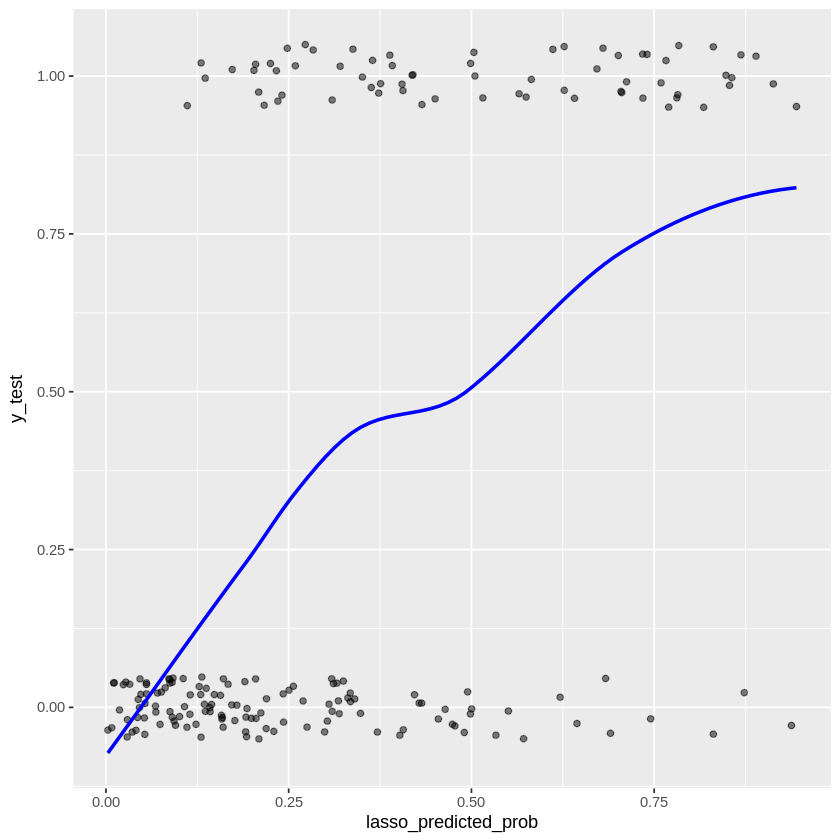

In [39]:
ggplot(data.frame(y_test, lasso_predicted_prob),
       aes(x = lasso_predicted_prob, y = y_test)) +
  geom_jitter(height = 0.05, alpha = 0.5) +
  geom_smooth(method = "loess", se = FALSE, color = "blue")